# DATA ANALYSIS HABERMAN'S DATASET 

Kaggle Link of the Dataset : https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

Information:   
1. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings   Hospital on the survival of patients who had undergone surgery for breast cancer.

Features:

1. Age of patient at time of operation (numerical)(independent_variable)
2. year (at that particular year patient undergoes treatment) (numerical)(independent_variable)
3. Number of positive axillary nodes detected (numerical)(independent_variable)
4. Survival status (class attribute) (dependent_variable) if 1 indicates the patient survived (>=5) years  and if 2 that indicates the patient died within    5 year(<5)

# OBJECTIVE 

1. THE OBJECTIVE OF THIS EXPLORATORY DATA ANALYSIS IS TO CLASSIFY THE PATIENTS WHO SURVIVED MORE THAN 5 YEARS AND DIED WITH IN    5 YEARS (THE PATIENTS UNDERGOES THE BREAST CANCER TREATMENT)

In [77]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
data=pd.read_csv("haberman.csv") #reading data from csv file

In [79]:
data.shape #printing the data shape

(306, 4)

In [80]:
data.columns #looking at columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [81]:
data.head() #printing first five rows

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [82]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [83]:
data.value_counts('status') #checking how many class labels and corresponding observations
#imbalanced dataset

status
1    225
2     81
dtype: int64

# Conclusions

1. We come to conclusion that the dataset is a imbalanced dataset
2. The output/dependent variable has two classes
3. Whole dataset has 306 observations 
4. 225 belongs to one class variable -- 1
5. 81 observations belongs to other class variable -- 2

# Bivariate_Analysis

Text(0, 0.5, 'nodes')

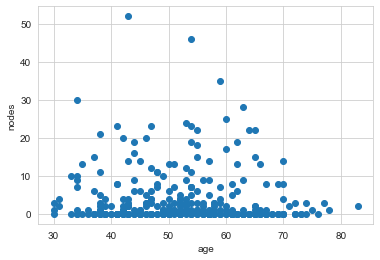

In [84]:
plt.scatter(data['age'],data['nodes'])#same plot using matplotlib
plt.xlabel("age")
plt.ylabel("nodes")

C:\Users\Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


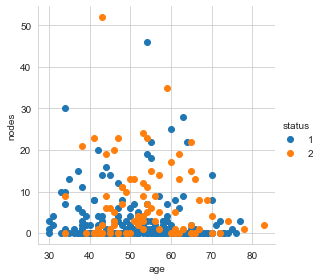

In [85]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", size=4).map(plt.scatter, "age", "nodes").add_legend()
plt.show()

# Conclusion

In this plot "age" vs "nodes" we are not able to distinguish between these two due to huge overlap but can partially conclude that the people with age less than 40 will survive more compared to other ages

C:\Users\Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


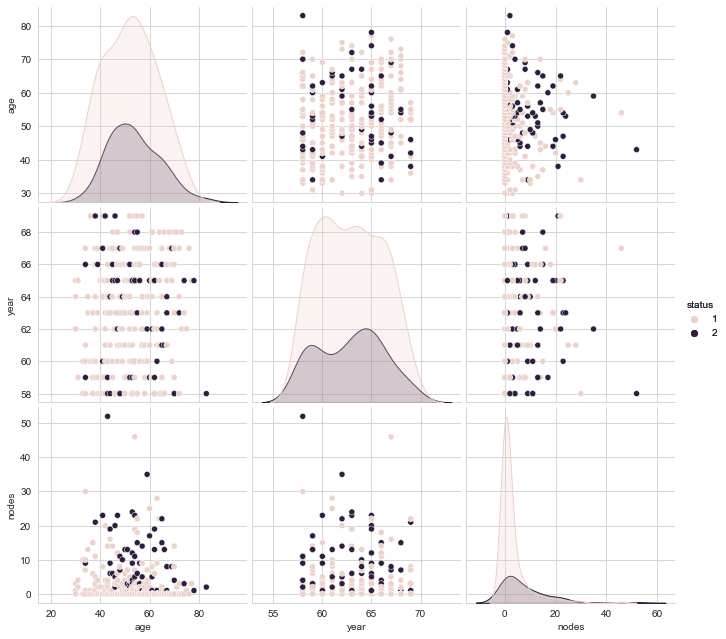

In [86]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", size=3)\
.add_legend()
plt.show()

# Conclusions

from the bivariate analysis we cannot come to conclusions since all points are operlapping 
the points are not linerly separable and
it is impossible to draw conclusions from this scatter plot (or) from pair plots

# Univariate Analysis

# U_A ON "nodes"

1. Doing univariate analysis only on nodes(positive axilary nodes detected) column because our objective is to classify the        patients who survived morethan 5 years and died within 5 years to do that I found this column is helpful from this reference 
   Reference : https://www.verywellhealth.com/lymph-node-positive-breast-cancer-429953

In [87]:
data_nodes1 = data.loc[data["status"] == 1]  #taking dataset of one class
data_nodes2 = data.loc[data["status"] == 2]  #other class

In [88]:
data_nodes1['nodes'].describe() #statistical information on axillary nodes (patients survived more than 5 years)

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: nodes, dtype: float64

# Small Observation

From this small statistical information only we can conclude
1. The mean of data points of class 1 is < 3 (means people survived more than 5 years has less axillary nodes)

In [89]:
data_nodes2['nodes'].describe() #statistical information on axillary nodes (patients who died within 5 years)

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: nodes, dtype: float64

# Small Observation

From this small statistical information only we can conclude
1. The mean of data points of class 2 is 8 (means people who died within 5 years has more axillary nodes)

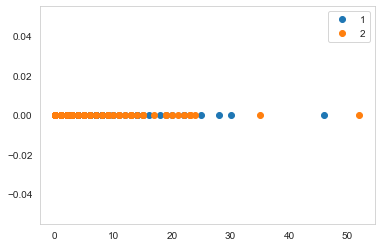

In [90]:
#SIMPLE SCATTER PLOT ON NODES
plt.plot(data_nodes1["nodes"], np.zeros_like(data_nodes1["nodes"]), 'o',label="1")
plt.legend()
plt.plot(data_nodes2["nodes"], np.zeros_like(data_nodes2["nodes"]), 'o',label="2")
plt.legend()
plt.grid()
plt.show()

# Conclusions

from this 1d scatter plot we are not able to find exactly how many points are the belongs to particular class and we are not able to get any information from this plot

C:\Users\Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


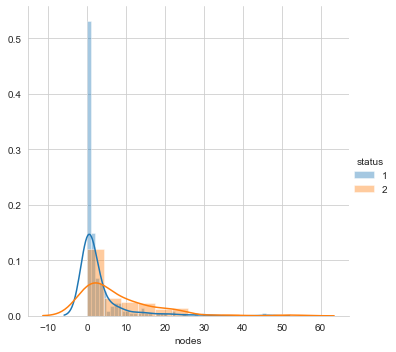

In [91]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

# Conclusions

From this "nodes" column we can say that the having minimum number of positive axillary nodes(below 5) are more chances to survive more than 5 years

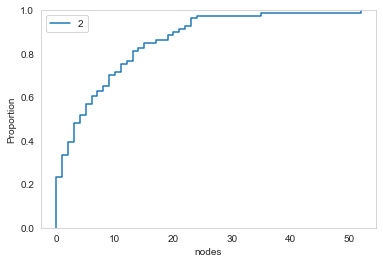

In [92]:
sns.ecdfplot(data_nodes2["nodes"],label="2")#cdf of nodes column of patients who died within the 5 years
plt.legend(loc='upper left')
plt.grid()

# Conclusions

From the cdf we can say that the people who having auxillary positive nodes (>5) are (60)% means the people having more positive auxillary nodes (>5) are more probability to die within 5 years

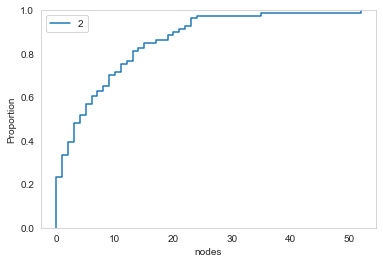

In [93]:
sns.ecdfplot(data_nodes2["nodes"],label="2")#cdf of nodes column of patients who survived above 5 years
plt.legend(loc='upper left')
plt.grid()

# Conclusions

From the cdf we can say that the probability of patients who survived above 5 years has axillary nodes detected are below (<=8) are 65% means people having less positive axillary nodes have more probability to survive above 5 years 

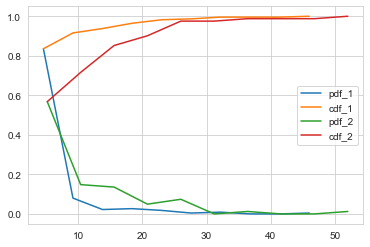

In [94]:
#compute pdf of nodes column (status ==1)
counts, bin_edges = np.histogram(data_nodes1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#compute CDF of nodes column (status ==1)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_1')
plt.plot(bin_edges[1:], cdf,label='cdf_1')
plt.legend()

#compute pdf of nodes column (status ==2)
counts, bin_edges = np.histogram(data_nodes2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#compute CDF of nodes column (status ==2)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_2')
plt.plot(bin_edges[1:], cdf,label='cdf_2')
plt.legend()

# Conclusions

From the pdf and cdf we can say that 
1. approximately 90% of people live more than 5 years who has nodes (<=8) (class 1)
2. The peole having more axillary nodes die within 5 years
3. 80% of people who died within 5 years has nodes (>15)

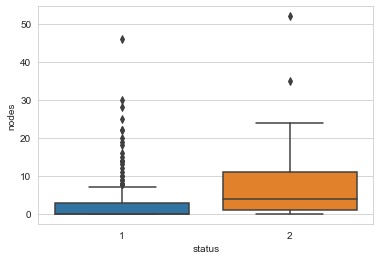

In [95]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

# Conclusions

1. From the first boxplots we can easily find percentiles
2. 75 percentage of people who has axillary nodes below 5 have survived above 5 years (class 1)
3. from the second box plot we can say that the probability of people will die is more who having nodes (>=12)  

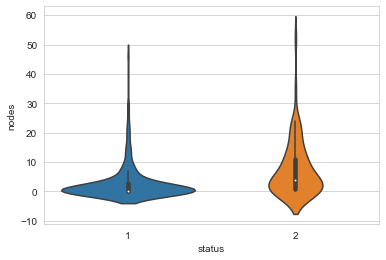

In [96]:
sns.violinplot(x="status", y="nodes", data=data, size=8)
plt.show()

# Conclusions

1. violin plot is same as boxplox with combination of density plot
2. the more data points of class 1 are below 6 (axillary nodes are less than 6) and spread is less
3. the data points of class 2 are above 8 (axillary nodes are more than 8) spread is more

# U_A ON "ages"

In [97]:
data_ages1 = data.loc[data["status"] == 1]  #taking dataset of one class
data_ages2 = data.loc[data["status"] == 2]  #other class

In [98]:
data_ages1['age'].describe() #statistical information on age (patients who survived more than 5 years)

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [99]:
data_ages2['age'].describe() #statistical information on age (patients who died within 5 years)

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

# Small Observation

1. i wont see much differnce with these feature to classify, because means are approximately equal
2. we can say the average age people undergoes treatment is between 52-53

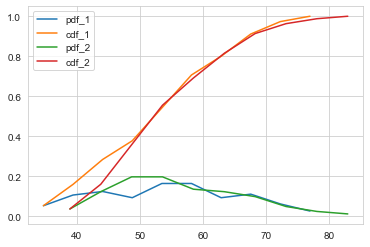

In [100]:
#compute pdf of nodes column (status ==1)
counts, bin_edges = np.histogram(data_ages1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
#compute CDF of nodes column (status ==1)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_1')
plt.plot(bin_edges[1:], cdf,label='cdf_1')
plt.legend()

#compute pdf of nodes column (status ==2)
counts, bin_edges = np.histogram(data_ages2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
#compute CDF of nodes column (status ==2)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_2')
plt.plot(bin_edges[1:], cdf,label='cdf_2')
plt.legend()

# Conclusions

1. I wont see much difference from this feature

C:\Users\Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


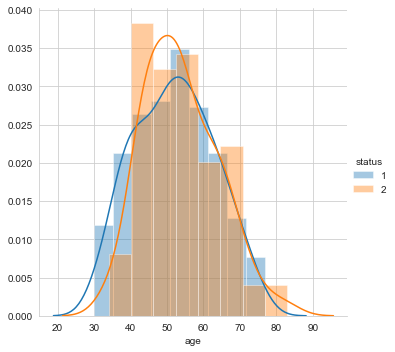

In [101]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

# Conclusion

1. By seeing histogram we can say that 20% of people survived more than 5 years having age < 40
2. The people having age above 40 are more likely to die within 5 years

# U_A ON "year"

In [102]:
data_year1 = data.loc[data["status"] == 1]  #taking dataset of one class
data_year2 = data.loc[data["status"] == 2]  #other class

In [103]:
data_year1['year'].describe() #statistical information on year (patients who survived more than 5 years)

count    225.000000
mean      62.862222
std        3.222915
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: year, dtype: float64

In [104]:
data_ages2['year'].describe() #statistical information on year (patients who died within 5 years)

count    81.000000
mean     62.827160
std       3.342118
min      58.000000
25%      59.000000
50%      63.000000
75%      65.000000
max      69.000000
Name: year, dtype: float64

# Small Observation 

1. Not much information from this feature for our objective
2. we can say that most people undergoes treatment in the year of 1962 from this information

C:\Users\Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


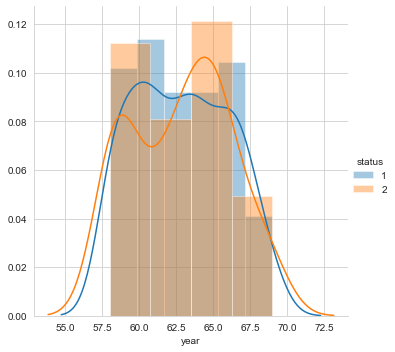

In [105]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

# Conclusion

1. Most of the people undergo treatment in year between (1960-1965)

#  This is the Exploratory Data Analysis upto my knowledge
# Thank you